<h1 style="font-size:400%;
    font-family:Georgia,serif;
	color:#4E443C;
	font-variant: small-caps; text-transform: none; font-weight: 100; margin-bottom: 0;" align="center"> Death Row Project </h1>
    
<h1 style="font-family:Georgia,serif;
	color:#4E443C;
	font-variant: small; text-transform: none; font-weight: 100; margin-bottom: 0;" align="center"> Analyzing death row inmates from the Texas Department of Justice through clustering and outlier detection </h1>


<h1 style="font-size:200%;
    font-family:Georgia,serif;
	color:#4E443C;
	font-variant: small-caps; text-transform: none; font-weight: 100; margin-bottom: 0;" align="center"> - $\infty$ - </h1>    
    
--------

## **Table of Contents**
* [Background and Purpose](##Background-and-Purpose)
* [Data Import and Overview](#Data-Import-and-Overview)
* [Data Cleaning](#Data-Cleaning)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Data Preprocessing](#Data-Preprocessing)
* [KMeans on Numerical Features](#KMeans-on-Numerical-Features)
* [KPrototypes on All Features](#KPrototypes-on-All-Features)
* [BGMM](#BGMM)
* [Outlier Detection](#Outlier-Detection)
* [Conclusions](#Conclusions)

## Background and Purpose

The Texas Department of Justice published a dataset consisting of all executed prisoners within Texas (https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html). The purpose of this project is to explore this dataset and more specifically answer the following main questions:

1. Which are the main segments wihin all executed prisoners and which characteristics do these group have?
    - Using KMeans, KPrototypes and BGMM --> Compare results
2. Who are the most extreme prisoners that stick out from the rest?

Exploratory Data Analysis will be use as a way to both answer the main questions and to provide interesting insights.


### **How was the data acquired?**
The Data was acquired through a web scraper that scraped all profiles on the webpage outlined above. Many of the profiles were in a scanned format (scanned papers) and could not be read by the scraper; these data points were tagged through a feature named "is_scanned". 

## Data Import and Overview

In [1]:
# Data Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset into pandas dataframe
data = pd.read_csv("/Users/kaya/Desktop/Data Science Path/AInteresting/Death_Row_Final/deathrow_scraper/deathrow_dataset.csv")

In [3]:
data

,execution_no,link_profile,link_statement,age_executed,date_executed,race,county,scanned_profile,full_name,tdcj,...,eye_color,native_county,native_state,prior_occupation,prior_prison_record,summary_of_incident,co_defendants,victim_info,offender,last_statement
0,561,dr_info/kingjohn.html,dr_info/kingjohnlast.html,44,4/24/2019,White,Jasper,False,"King, John William",999295.0,...,Brown,Atlanta,Georgia,"\r\ncarpenter, laborer","\r\n TDCJ-ID #624420, 10-year sentence for o...","\r\n On 06/07/98, during the nighttime hours...","\r\n Berry, Shawn; Brewer, Lawrence Russell",\r\n Black male,"John William King, TDCJ #999295",Spoken: No.
1,563,dr_info/crutsingerbilly.html,dr_info/crutsingerbillylast.html,64,9/4/2019,White,Tarrant,False,"Crutsinger, Billy Jack",999459.0,...,Green,Tarrant,Texas,\r\nLaborer,",\r\n #1014350 - On a one-year sentence from...",",\r\n On April 6, 2003, in Fort Worth, Texas...",",\r\n None",",\r\n White female; White female",Billy Jack Crutsinger,Hi ladies I wanted to tell ya’ll how much I l...
2,562,dr_info/swearingenlarry.html,dr_info/swearingenlarrylast.html,48,8/21/2019,White,Montgomery,False,Larry Ray Swearingen,999361.0,...,Blue,Montgomery,Texas,"\r\nelectrician, mechanic, laborer",\r\n #758150 – On a two-year sentence for one...,"\r\n On December 8, 1998, Swearingen kidnappe...",\r\n None,\r\n White female,"Swearingen, Larry #999361",Lord forgive them. They don’t know what they ...
3,558,dr_info/brazielalvin.html,dr_info/brazielalvinlast.html,43,12/11/2018,Black,Dallas,False,"Braziel, Alvin Avon Jr.",999393.0,...,Brown,Dallas,Texas,\r\nLaborer,",\r\n #792374 on a 5 year sentence from Dal...",",\r\n On 9/21/1993 at 9:00 p.m. in Mesquite...",",\r\n None",",\r\n White male","Alvin Avon Braziel, Jr. #999393","Yes Sir, I would like to thank the Shape Commu..."
4,557,dr_info/garciajoseph.html,dr_info/garciajosephlast.html,47,12/04/2018,Hispanic,Dallas,False,"Garcia, Joseph Christopher",999441.0,...,Brown,Bexar,Texas,"\r\nmaintenance, laborer",\r\n #774391 on a 50 year sentence from Bexa...,"\r\n On 12/24/2000, in Irving, Texas, Garcia...","\r\n Patrick Murphy, George Rivas, Randy Hal...",\r\n white male,"Joseph Christopher Garcia, TDCJ #999441",Yes Sir. Dear Heavenly Father please forgive t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,550,dr_info/davilaerick.html,dr_info/davilaericklast.html,31,4/25/2018,Black,Tarrant,False,"Davila, Erick Daniel",999545.0,...,Brown,Tarrant,Texas,\r\nNone,",\r\n TDCJ #1369222 - Burglary Habitation",",\r\n On April 26, 2008, the subject and co...",",\r\n Garfield Thompson",",\r\n One (1) black adult female and one (1)...","Davila, Erick Daniel","Yes, I would like to say nephew it burns huh. ..."
564,552,dr_info/bibledanny.html,dr_info/bibledannylast.html,66,6/27/2018,White,Harris,False,"Bible, Danny Paul",999455.0,...,Blue,Brazoria,Texas,"\r\nWarehouseman, Electrician, Laborer",",\r\n #381513 on a 25 year sentence from Pa...",",\r\n On 05/27/1979, in Harris County, Bi...",",\r\n None",", White/Female",Danny Bible #999455,NaN
565,553,dr_info/youngchristopher.html,dr_info/youngchristopherlast.html,34,7/17/2018,Black,Bexar,False,"Young, Christopher Anthony",999508.0,...,Brown,Bexar,Texas,\r\nLaborer,\r\n None,"\r\n On 11/21/2004 in Bexar County, Young,...",\r\n None,\r\n Asian Male,Christopher Anthony Young #999508,l want to make sure the Patel family knows I l...
566,542,dr_info/bigbyjames.jpg,dr_info/bigbyjameslast.html,61,3/14/2017,White,Tarrant,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,James Bigby #997,"Yes, I do, Grace Kehler is that you? I have gi..."


In [4]:
data.shape

(568, 30)

**Checking missing values for the whole dataset.**

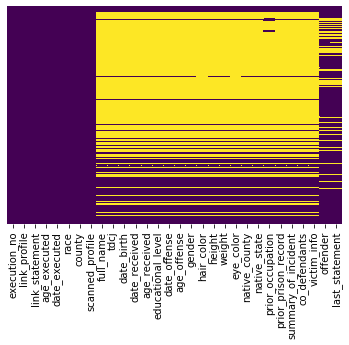

In [6]:
# Display an overview of all Null values within the dataset in yellow.
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**And for the datapoints that were not scanned...**

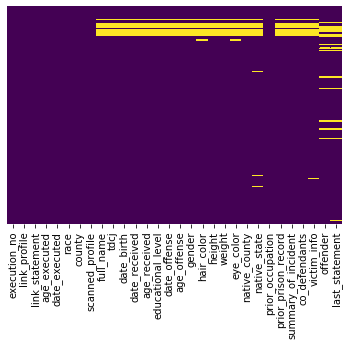

In [7]:
# Display an overview of all the Null values within non-scanned profiles
sns.heatmap(data[data["scanned_profile"]==False].isnull(), yticklabels=False, cbar=False, cmap='viridis')

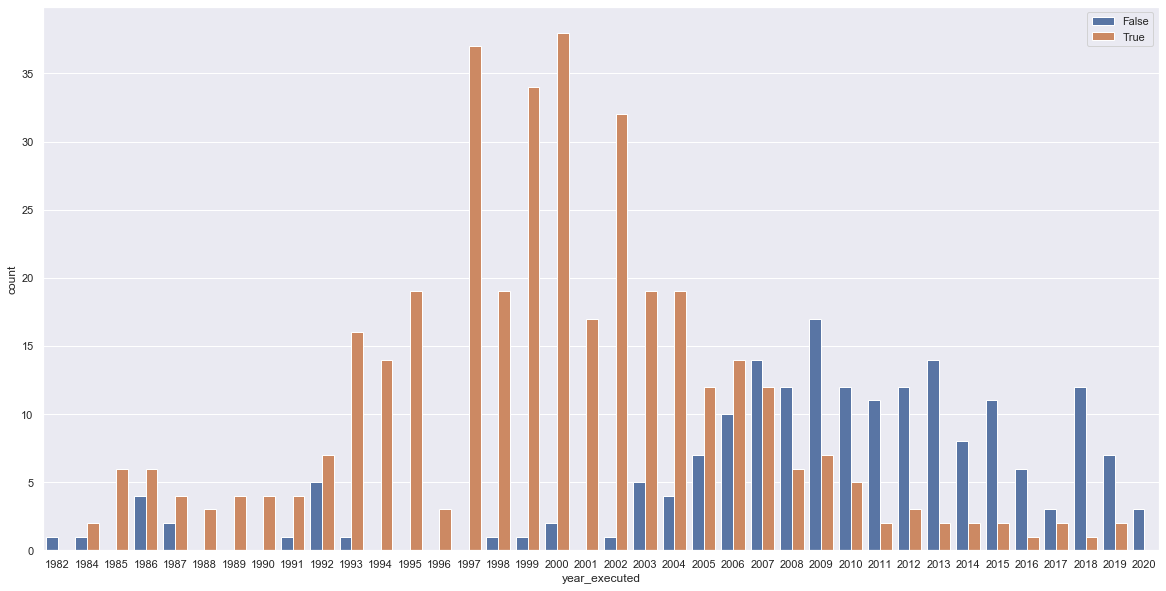

In [8]:
# Exploring if the profiles were scanned based on the year of execution
from datetime import datetime

data["date_executed"] = data["date_executed"].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
data["year_executed"] = data["date_executed"].apply(lambda x: x.year)

sns.set(rc={'figure.figsize': (20, 10)})
sns.countplot(x="year_executed", hue="scanned_profile", data=data)
plt.legend()

As seen in figure above, the profiles of the inmates were scanned in earlier days. After 2007, the department increasingly started entering the inmate profiles in a digital, non-scanned format. This explains the appearance of scanned profiles within the dataset.

We will drop all scanned profiles (images of documents) since we cannot access this data. There might be potential to access this data through OCR reading and this option might be explored later.

*Note: The exclusion of scanned datapoints will bias the dataset towards 'more recent' executions due to above explanation.*

In [9]:
# Taking a closer look at the missing values within the dataset of not scanned profiles
len(data[data["scanned_profile"] == False][data["full_name"].isnull()])

/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


11

Even after excluding all scanned profiles, we still have 11 missing datapoints that were not obtained due to scraping error. We will exclude these erronous datapoints aswell.

/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


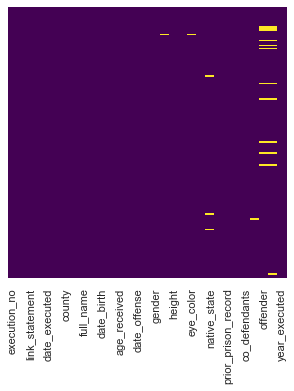

In [36]:
plt.figure(figsize=(5, 5))
X = data[data["scanned_profile"] == False][data["full_name"].isnull()==False]
sns.heatmap(X.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [26]:
dropped_values = data.shape[0] - X.shape[0]
values_left = round(X.shape[0] / data.shape[0] * 100, 2)
print("Dropped {} scanned/erroneous datapoints. We will use {} % of the initial dataset.".format(dropped_values, values_left))

Dropped 391 scanned/erroneous datapoints. We will use 31.16 % of the initial dataset.


Great, now we have excluded the scanned/erroneous datapoints. Now, we will look into the features and drop the ones that are deemed unnecessary for this project.

In [27]:
unnecessary_columns = ["execution_no", "link_profile", "link_statement", "date_executed", "county", "scanned_profile",
                      "full_name", "tdcj", "date_birth", "date_received", "date_offense", "native_county",
                      "summary_of_incident", "offender", "last_statement", "year_executed", "hair_color", "eye_color", "native_state"]
X_slim = X.drop(columns=unnecessary_columns)

In [28]:
X_slim.head(3)

,age_executed,race,age_received,educational_level,age_offense,gender,height,weight,prior_occupation,prior_prison_record,co_defendants,victim_info
0,44,White,24.0,10,23.0,Male,5′ 9″,198,"\r\ncarpenter, laborer","\r\n TDCJ-ID #624420, 10-year sentence for o...","\r\n Berry, Shawn; Brewer, Lawrence Russell",\r\n Black male
1,64,White,49.0,11,48.0,Male,5′ 9″,217,\r\nLaborer,",\r\n #1014350 - On a one-year sentence from...",",\r\n None",",\r\n White female; White female"
2,48,White,29.0,11,27.0,Male,5′ 10″,194,"\r\nelectrician, mechanic, laborer",\r\n #758150 – On a two-year sentence for one...,\r\n None,\r\n White female


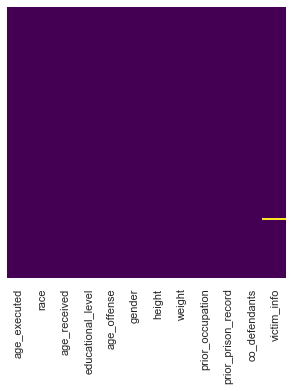

In [29]:
plt.figure(figsize=(5,5))
sns.heatmap(X_slim.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Data Cleaning

In [30]:
X_slim.head(3)

,age_executed,race,age_received,educational_level,age_offense,gender,height,weight,prior_occupation,prior_prison_record,co_defendants,victim_info
0,44,White,24.0,10,23.0,Male,5′ 9″,198,"\r\ncarpenter, laborer","\r\n TDCJ-ID #624420, 10-year sentence for o...","\r\n Berry, Shawn; Brewer, Lawrence Russell",\r\n Black male
1,64,White,49.0,11,48.0,Male,5′ 9″,217,\r\nLaborer,",\r\n #1014350 - On a one-year sentence from...",",\r\n None",",\r\n White female; White female"
2,48,White,29.0,11,27.0,Male,5′ 10″,194,"\r\nelectrician, mechanic, laborer",\r\n #758150 – On a two-year sentence for one...,\r\n None,\r\n White female


In [31]:
# Identify all colums that has more than 50% missing values (will be all rows with scanned profiles)
features_with_na=[feature for feature in X_slim.columns if X_slim[feature].isnull().values.any()]
features_with_na

['victim_info']

In [32]:
X_slim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 567
Data columns (total 12 columns):
age_executed           177 non-null int64
race                   177 non-null object
age_received           177 non-null float64
educational_level      177 non-null object
age_offense            177 non-null float64
gender                 177 non-null object
height                 177 non-null object
weight                 177 non-null object
prior_occupation       177 non-null object
prior_prison_record    177 non-null object
co_defendants          177 non-null object
victim_info            176 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 18.0+ KB


We will replace all N/A values (1) within the victim_info columns with a "None".

In [33]:
X_slim["victim_info"].fillna(value="None", inplace=True)

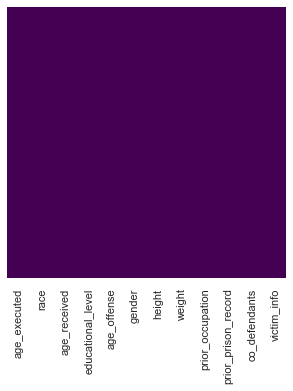

In [35]:
plt.figure(figsize=(5, 5))
sns.heatmap(X_slim.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

**All Null values are now handled, lets move forward with the cleaning.**

In [37]:
num_features = [feature for feature in X_slim.columns if X_slim[feature].dtype != "O"]
cat_features = [feature for feature in X_slim.columns if X_slim[feature].dtype == "O"]
print("Numerical Features: ", num_features)
print("Categorical Features: ", cat_features)

Numerical Features:  ['age_executed', 'age_received', 'age_offense']
Categorical Features:  ['race', 'educational_level', 'gender', 'height', 'weight', 'prior_occupation', 'prior_prison_record', 'co_defendants', 'victim_info']


In [38]:
X_slim[cat_features].nunique()

race                     5
educational_level       28
gender                   3
height                  24
weight                 106
prior_occupation        91
prior_prison_record    106
co_defendants           87
victim_info            121
dtype: int64

In [39]:
X_slim[num_features].nunique()

age_executed    36
age_received    33
age_offense     32
dtype: int64

From the value counts, it is clear to see that some categorical values are continuous. We visualize the distributions for both the numerical and the categorical values to get an overview of the data distributions.

race


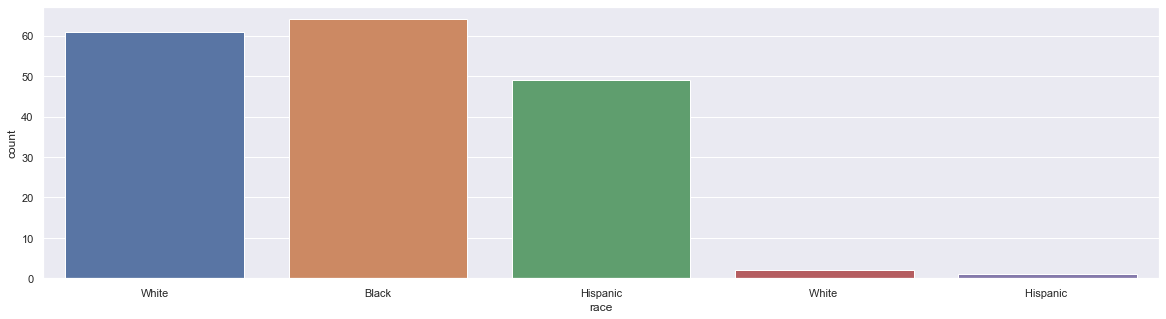

educational_level


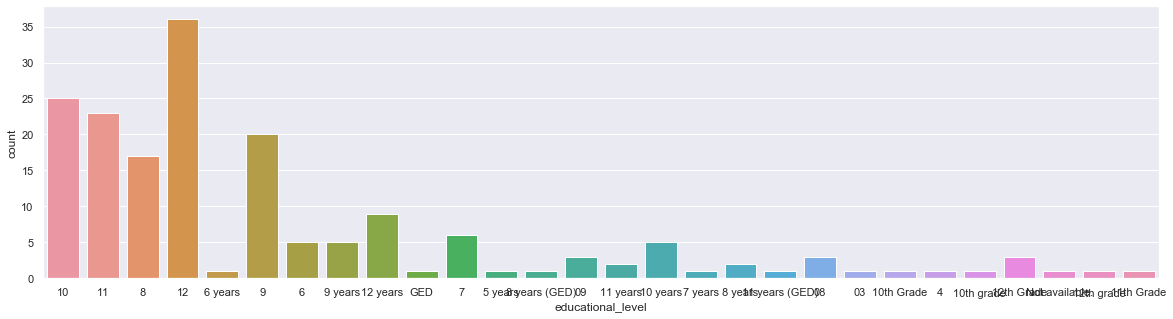

gender


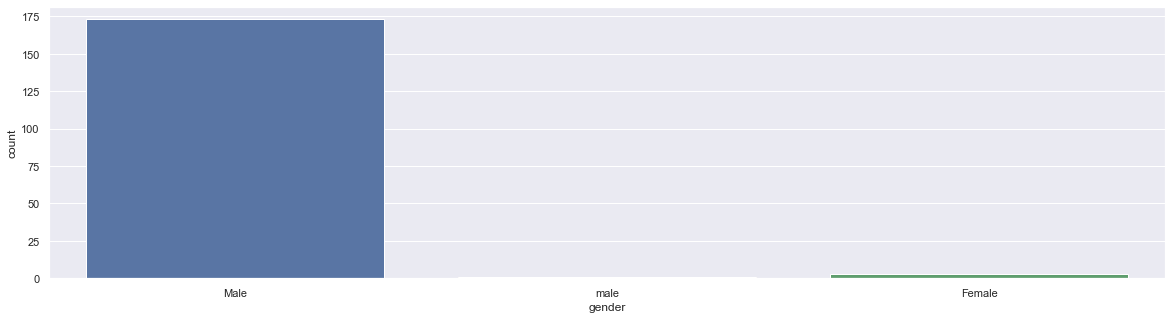

height


/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


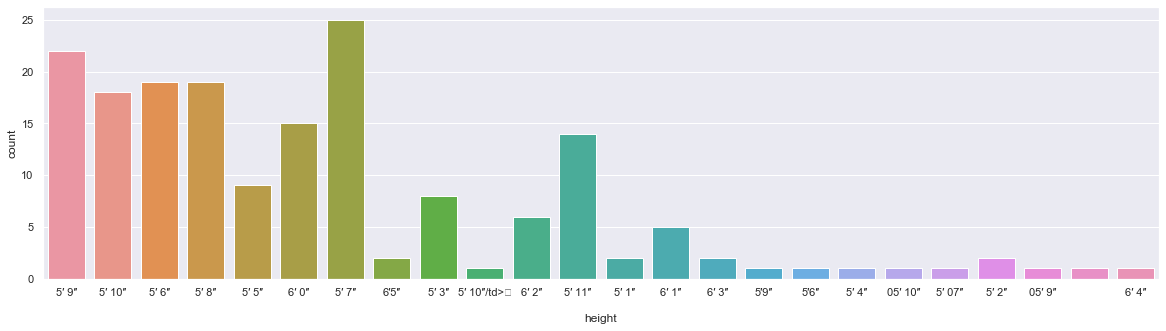

weight


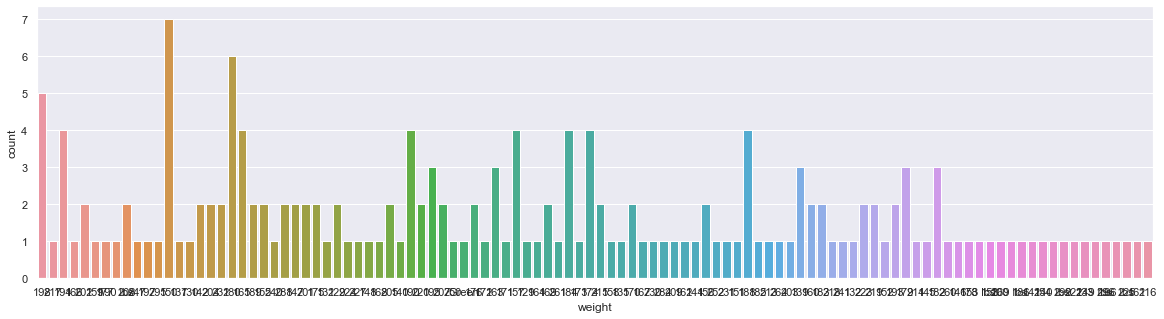

prior_occupation


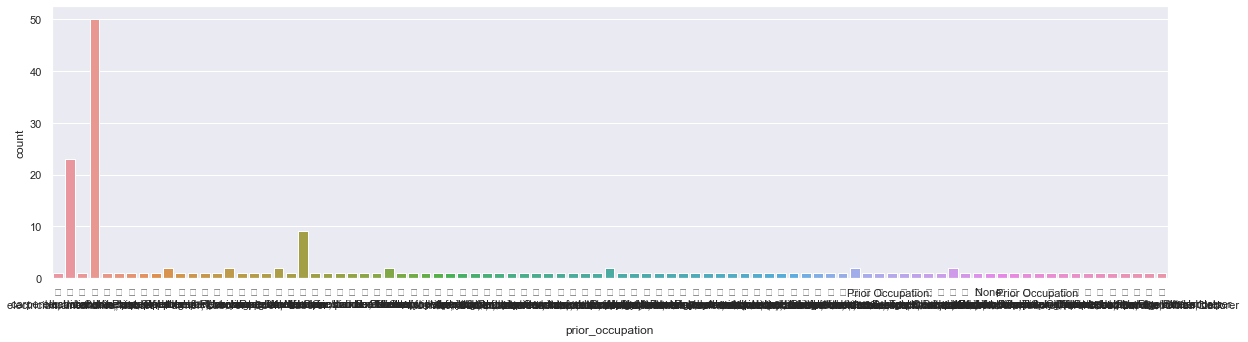

prior_prison_record


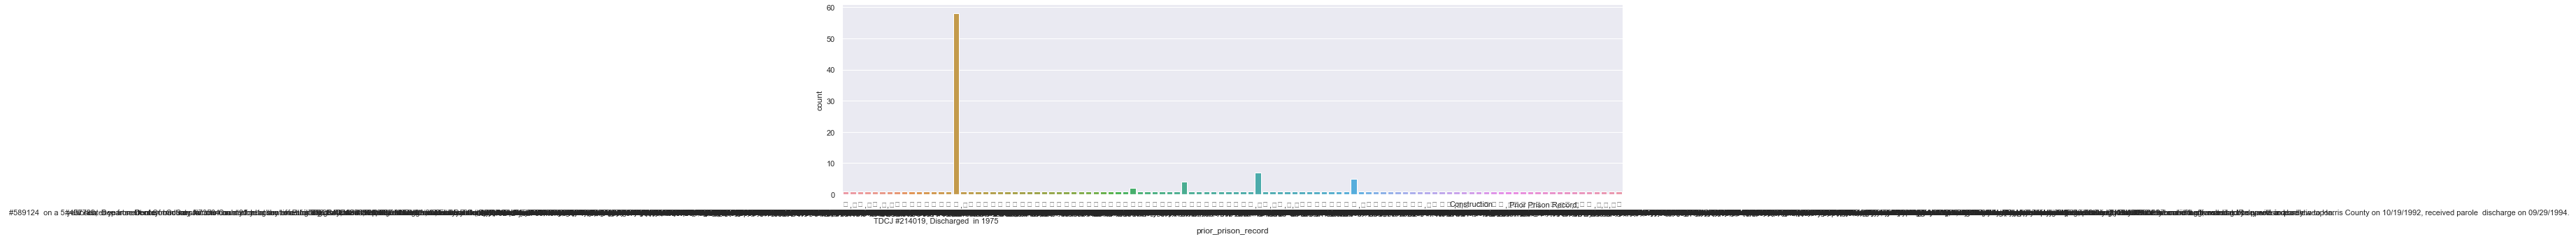

co_defendants


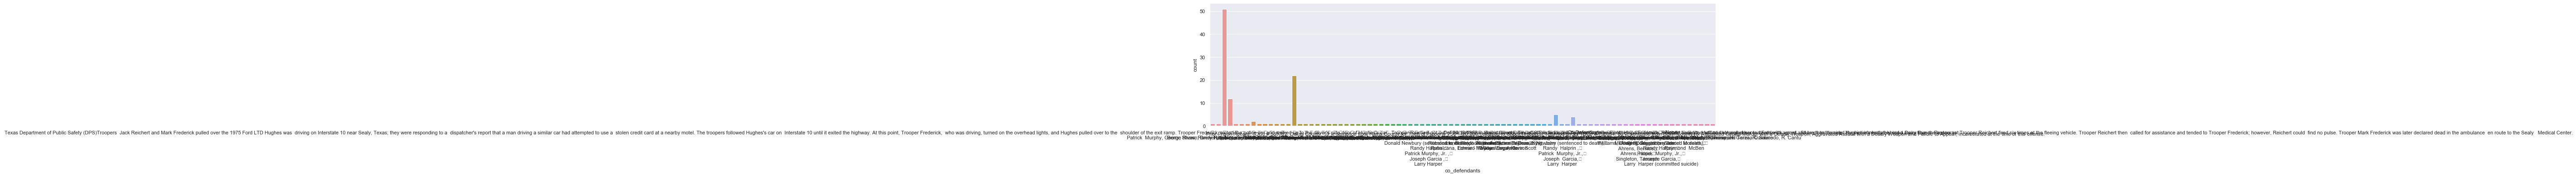

victim_info


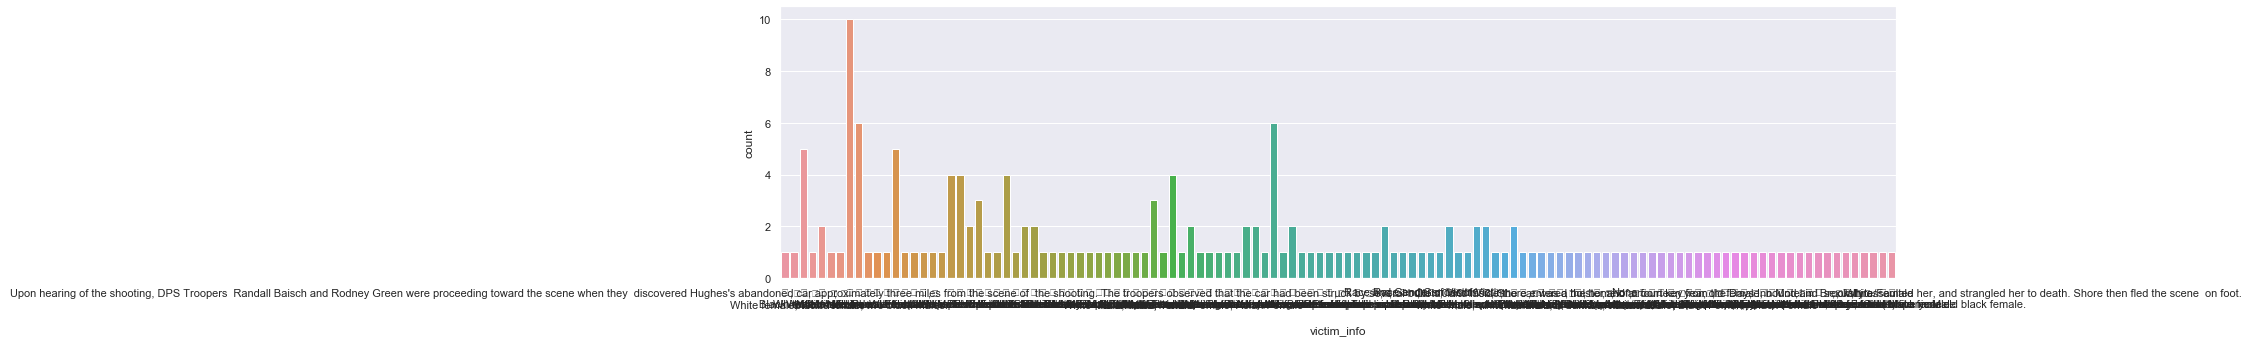

In [40]:
for feat in cat_features:
    print(feat)
    plt.figure(figsize=(20, 5))
    sns.countplot(x=feat, data=X_slim)
    plt.show()

age_executed


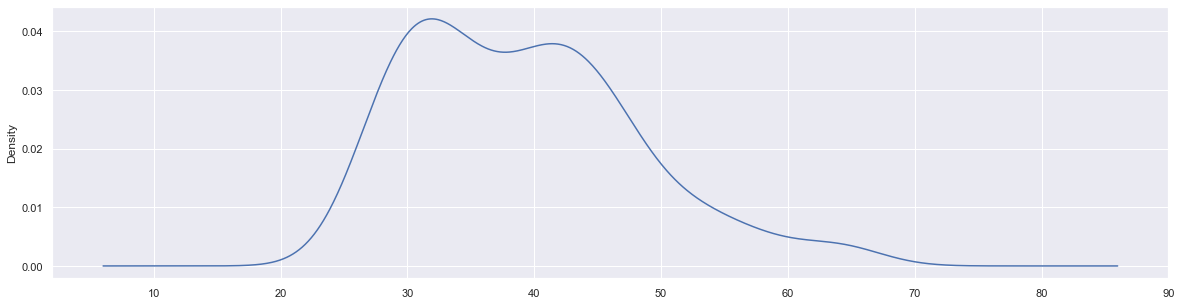

age_received


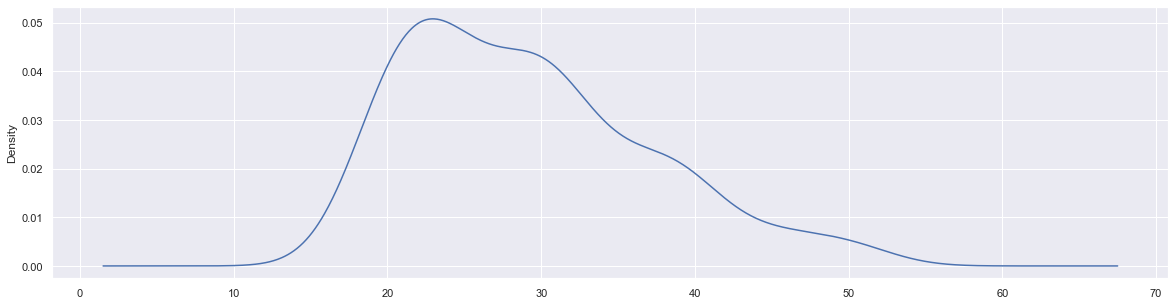

age_offense


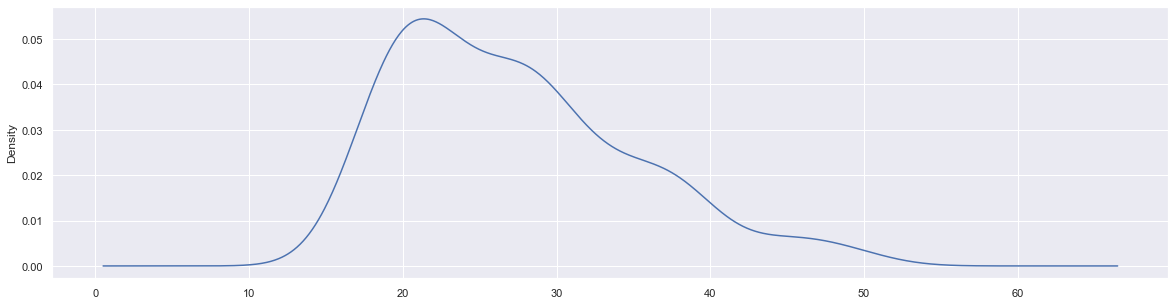

In [41]:
for feat in num_features:
    print(feat)
    plt.figure(figsize=(20, 5))
    X_slim[feat].plot(kind="kde")
    plt.show()

**From the visualization above, we need to do the following with the categorical features:**
- Convert weight into a numerical value and to kgs --> DONE.
- Convert height into a numerical value and cms --> DONE.
- Clean duplicate values for multiple features such as hair_color, eye_color etc. --> DONE.
- Turn Co-defendants into a "Yes" or "No" --> to know if the crime was committeed alone --> DONE.
- Turn Prior Prison Record into "Yes" and "No" --> DONE.
- Use OneHot Encoding for all categorical values and potentially use PCA on those values --> DONE
- Process Victim Info into categories --> DONE.
- Process Prior Occupation --> interesting one --> DONE.

**For the numerical values, we will simply have to normalize / standardize these during the preprocessing stage. There is also a pretty high chance that the numerical values are highly correlated, if so, we will handle that aswell.**

In [42]:
# Format height feature --> inches into CM, fill NaN values with the mean
import re

def into_cm(str):
    try:
        cm = 0
        ints = str.split("′")
        feet= int(re.sub("[^0-9]", "", ints[0]))
        inches = int(re.sub("[^0-9]", "", ints[1]))
        inches += feet * 12
        cm = round(inches * 2.54)
        return cm
    except:
        return str
    
#data = complete_profiles.copy()
X_slim["height"] = X_slim["height"].apply(lambda x: into_cm(x))
X_slim["height"] = X_slim["height"].apply(lambda x: x if type(x) is int else None)
X_slim["height"] = X_slim["height"].fillna(round(X_slim["height"].mean()))

In [43]:
# Format columns that contain continuous values into ints
def convert_num(x):
    try:
        return re.search(r'\d+', str(x)).group()
    except:
        return "N/A"

to_num_features = ["height", "educational_level", "weight"]

for feature in to_num_features:
    X_slim[feature] = X_slim[feature].apply(lambda x: convert_num(x))
    X_slim[feature] = pd.to_numeric(X_slim[feature], errors="coerce")

In [44]:
# Format weight feature --> lbs into KG, fill NaN values with the mean
X_slim["weight"] = X_slim["weight"].fillna(X_slim["weight"].mean())
X_slim["weight"] = X_slim["weight"].apply(lambda x: round(x * 0.45359237))

In [45]:
num_features = [feature for feature in X_slim.columns if X_slim[feature].dtype != "O"]
cat_features = [feature for feature in X_slim.columns if X_slim[feature].dtype == "O"]
print("Numerical Features: ", num_features)
print("Categorical Features: ", cat_features)

Numerical Features:  ['age_executed', 'age_received', 'educational_level', 'age_offense', 'height', 'weight']
Categorical Features:  ['race', 'gender', 'prior_occupation', 'prior_prison_record', 'co_defendants', 'victim_info']


In [46]:
# Format columns that contain categorical values into lowercase and strip
for feature in cat_features:
    X_slim[feature] = X_slim[feature].apply(lambda x: str.lower(str.strip(str(x))))

In [48]:
# Cleaning feature 'prior_occupation'
def clean_occupations(list_occupations):
    clean_list = []
    for element in list_occupations:
        element = element.lower()
        element = element.strip()
        clean_list.append(element)
    return clean_list

#data = complete_profiles.copy()
X_slim["prior_occupation"] = X_slim["prior_occupation"].apply(lambda x: x.replace("\r\n",""))
X_slim["prior_occupation"] = X_slim["prior_occupation"].apply(lambda x: x.replace("/", ","))
X_slim["prior_occupation"] = X_slim["prior_occupation"].apply(lambda x: x.split(","))
X_slim["prior_occupation"] = X_slim["prior_occupation"].apply(lambda x: clean_occupations(x))

In [51]:
# This will be used for the EDA
all_occupations = sum(X_slim["prior_occupation"], [])

In [76]:
all_occupations

['carpenter',
 'laborer',
 'laborer',
 'electrician',
 'mechanic',
 'laborer',
 'laborer',
 'maintenance',
 'laborer',
 'laborer',
 'cabinet maker',
 'painter',
 'laborer',
 'machine  operator',
 'laborer',
 "electrician's  helper",
 "plumber's helper",
 'laborer',
 'laborer',
 'laborer',
 'welder',
 'laborer',
 'laborer',
 "carpenter's  helper",
 'bookkeeper',
 'laborer',
 'farmer',
 'laborer',
 'laborer',
 'shipping  & receiving',
 'laborer',
 'laborer',
 'laborer',
 'laborer',
 'unknown',
 'laborer',
 'cook',
 'carpenter',
 'laborer',
 'laborer',
 'warehouse  worker',
 'roughneck',
 'carpenter',
 'laborer',
 'cook',
 'laborer',
 'unknown',
 'fast  food',
 'carpenter',
 'laborer',
 'laborer',
 'mechanic',
 'laborer',
 'laborer',
 'laborer',
 'ranch helper',
 'painter',
 'laborer',
 'laborer',
 'laborer',
 'laborer',
 'correctional  officer',
 'construction worker',
 'unknown',
 'laborer',
 'laborer',
 'laborer',
 'laborer',
 'gardener',
 'laborer',
 'unknown',
 'none',
 'cook',
 'plu

In [77]:
# Dropping this feature from the dataset as it will only be used for EDA.
X_slim.drop(columns="prior_occupation", inplace=True)

['carpenter',
 'laborer',
 'laborer',
 'electrician',
 'mechanic',
 'laborer',
 'laborer',
 'maintenance',
 'laborer',
 'laborer',
 'cabinet maker',
 'painter',
 'laborer',
 'machine  operator',
 'laborer',
 "electrician's  helper",
 "plumber's helper",
 'laborer',
 'laborer',
 'laborer',
 'welder',
 'laborer',
 'laborer',
 "carpenter's  helper",
 'bookkeeper',
 'laborer',
 'farmer',
 'laborer',
 'laborer',
 'shipping  & receiving',
 'laborer',
 'laborer',
 'laborer',
 'laborer',
 'unknown',
 'laborer',
 'cook',
 'carpenter',
 'laborer',
 'laborer',
 'warehouse  worker',
 'roughneck',
 'carpenter',
 'laborer',
 'cook',
 'laborer',
 'unknown',
 'fast  food',
 'carpenter',
 'laborer',
 'laborer',
 'mechanic',
 'laborer',
 'laborer',
 'laborer',
 'ranch helper',
 'painter',
 'laborer',
 'laborer',
 'laborer',
 'laborer',
 'correctional  officer',
 'construction worker',
 'unknown',
 'laborer',
 'laborer',
 'laborer',
 'laborer',
 'gardener',
 'laborer',
 'unknown',
 'none',
 'cook',
 'plu

In [69]:
# Extracting information from the 'victim info' 
def clean_victims(victim_text):
    if (re.search(r'\bfemale\b', victim_text) or re.search(r'\bfemales\b', victim_text)) and (re.search(r'\bmale\b', victim_text) or re.search(r'\bmales\b', victim_text)):
        return "female and male"
    elif re.search(r'\bfemale\b', victim_text) or re.search(r'\bfemales\b', victim_text):
        return "female"
    elif re.search(r'\bmale\b', victim_text) or re.search(r'\bmales\b', victim_text):
        return "male"
    else:
        return "n/a"

X_slim["victim_info"] = X_slim["victim_info"].apply(lambda x: clean_victims(x))

In [71]:
# Printing all the cleaned values of victim info.
unique, counts = np.unique(X_slim["victim_info"], return_counts=True)
for i in zip(unique, counts):
    print(i)

('female', 68)
('female and male', 30)
('male', 73)
('n/a', 6)


In [72]:
X_slim["co_defendants"] = X["co_defendants"]
X_slim["co_defendants"] = X_slim["co_defendants"].apply(lambda x: str.lower(str.strip(str(x))))

In [73]:
# For co defendants and prior prison record, replace all none with no and rest with yes
X_slim["co_defendants"] = X_slim["co_defendants"].apply(lambda x: "no" if "none" in x else "yes")
X_slim["prior_prison_record"] = X_slim["prior_prison_record"].apply(lambda x: "no" if "none" in x else "yes")

In [78]:
num_features = [feature for feature in X_slim.columns if X_slim[feature].dtype != "O"]
cat_features = [feature for feature in X_slim.columns if X_slim[feature].dtype == "O"]
print("Numerical Features: ", num_features)
print("Categorical Features: ", cat_features)

Numerical Features:  ['age_executed', 'age_received', 'educational_level', 'age_offense', 'height', 'weight']
Categorical Features:  ['race', 'gender', 'prior_prison_record', 'co_defendants', 'victim_info']


In [75]:
cat_features

['race',
 'gender',
 'prior_occupation',
 'prior_prison_record',
 'co_defendants',
 'victim_info']

race


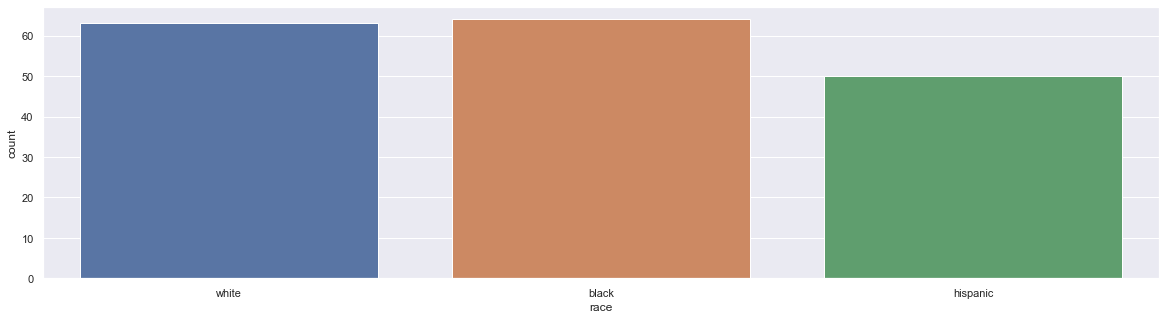

gender


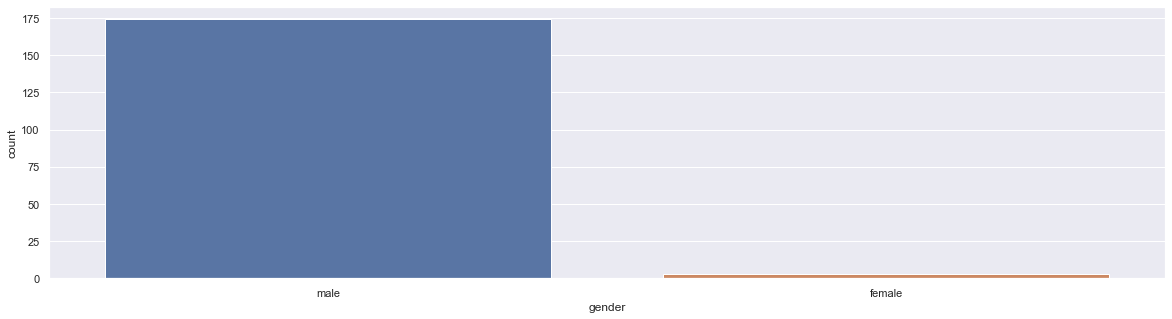

prior_prison_record


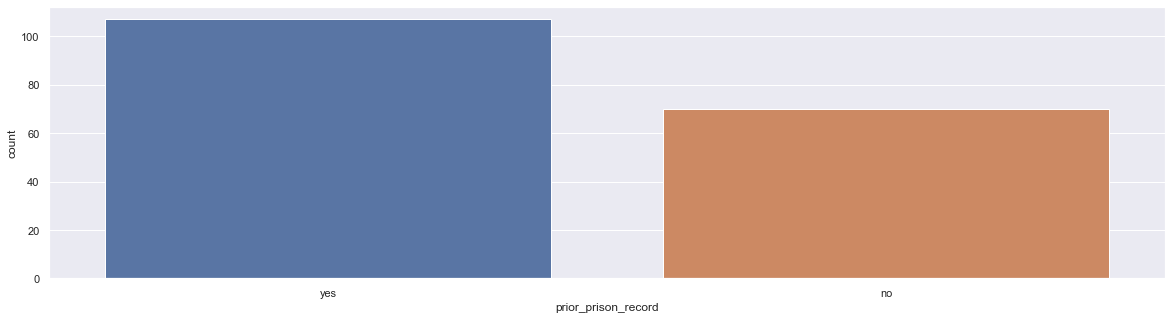

co_defendants


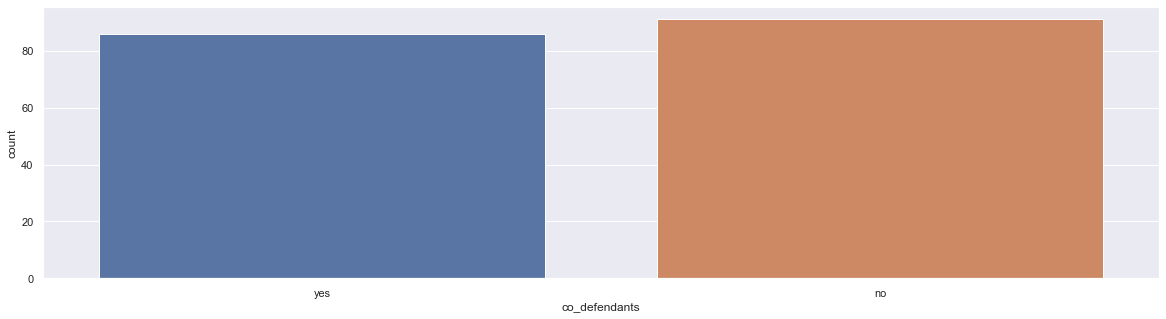

victim_info


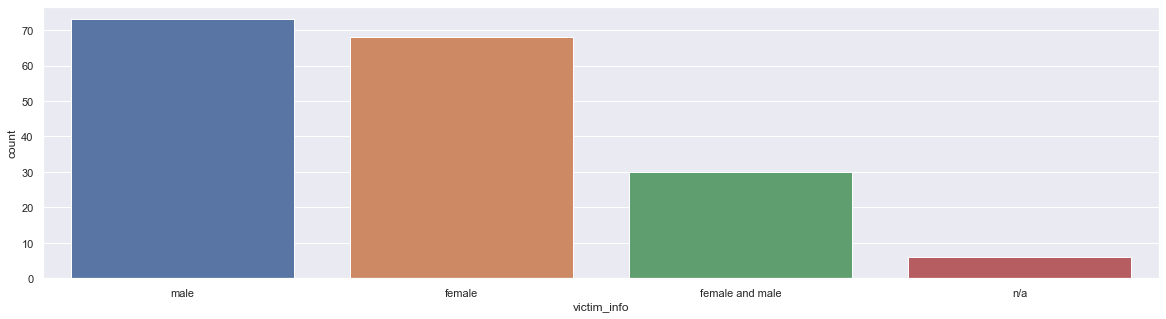

In [79]:
for feat in cat_features:
    print(feat)
    plt.figure(figsize=(20, 5))
    sns.countplot(x=feat, data=X_slim)
    plt.show()

## Exploratory Data Analysis

### Prior occupations

In [56]:
from wordcloud import WordCloud

In [59]:
all_occupations_str = ' '.join([str(elem) for elem in all_occupations]) 

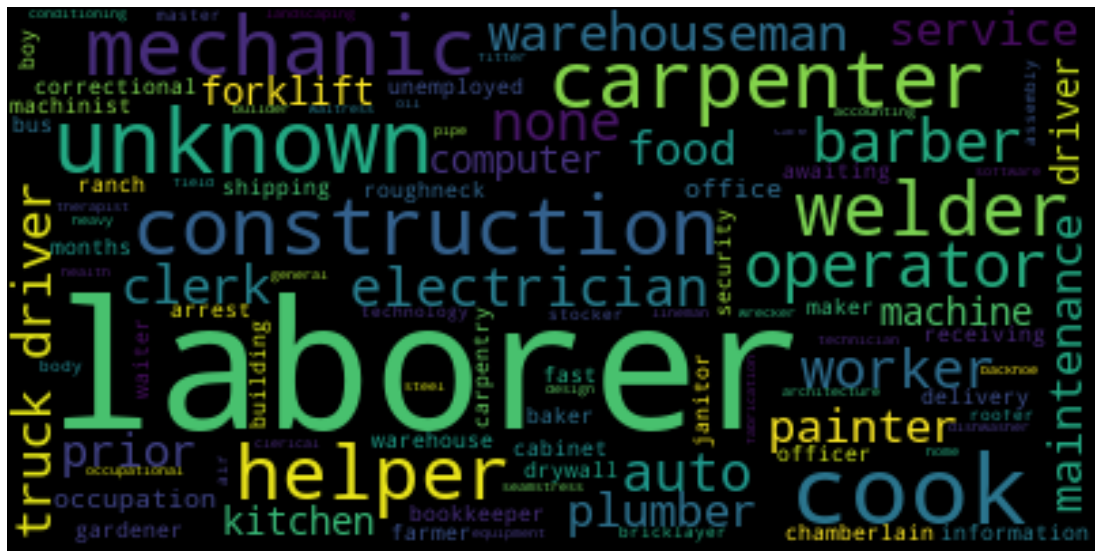

In [67]:
# Create the wordcloud object
wordcloud = WordCloud().generate(all_occupations_str)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [68]:
# The top 10 prior occupations of the executed prisoners
from collections import Counter

Counter(all_occupations).most_common(10)

[('laborer', 135),
 ('cook', 13),
 ('unknown', 11),
 ('carpenter', 8),
 ('welder', 7),
 ('construction', 7),
 ('barber', 5),
 ('none', 4),
 ('warehouseman', 4),
 ('electrician', 3)]

### Overall

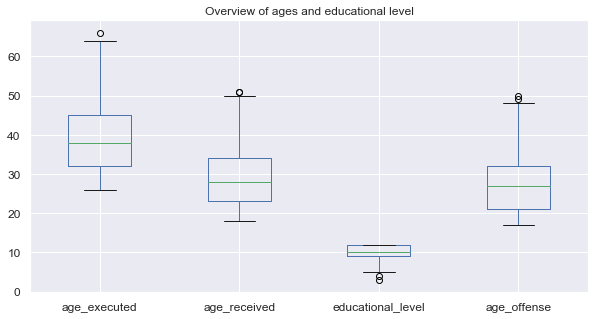

In [85]:
X_slim.iloc[:,:5].plot(kind="box", figsize=(10,5), fontsize=12, title="Overview of ages and educational level")

- The prisoners committed the crimes between 17 and 50 years old. Noone committed their crime over 50.
- We can see that there is a clear 'waiting time' before execution; the first boxplot spans during later ages.
- We can see that ages probably are highly correlated, and might drop at least one age feature.
- Medium education age seem to be approx. 10.

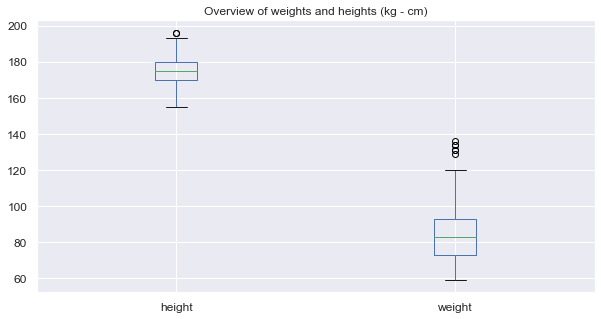

In [83]:
X_slim.iloc[:,5:].plot(kind="box", figsize=(10,5), fontsize=12, title="Overview of weights and heights (kg - cm)")

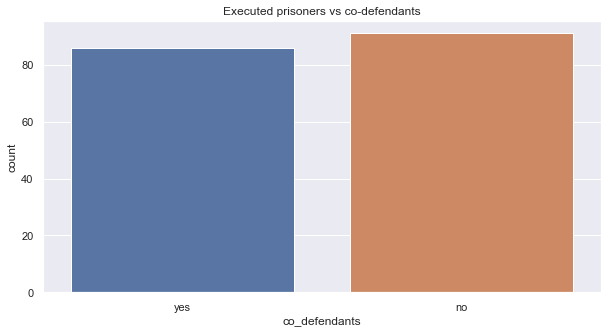

In [88]:
plt.figure(figsize=(10,5))
plt.title("Executed prisoners vs co-defendants")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
sns.countplot(x="co_defendants", data=X_slim)

- Almost 50% of prisoners committed their crimes with co-defendants.

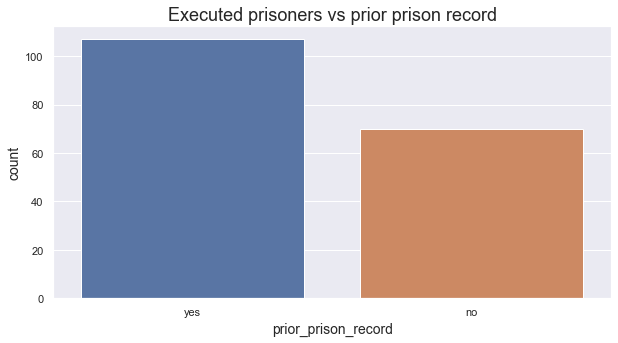

In [89]:
plt.figure(figsize=(10,5))
plt.title("Executed prisoners vs prior prison record")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
sns.countplot(x="prior_prison_record", data=X_slim)

- Most of the prisoners had a prior prison record, approx. 60%. Surprisingly, approx 40% had no previous prison record before receiving the death penalty.

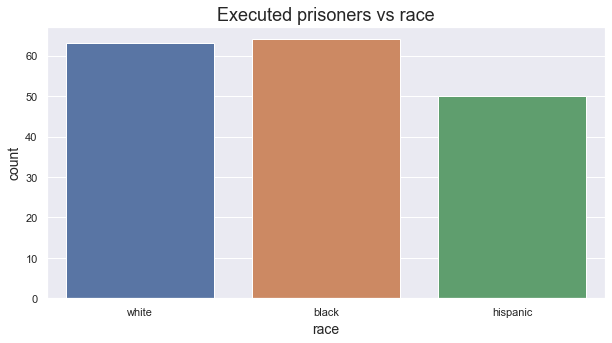

In [90]:
plt.figure(figsize=(10,5))
plt.title("Executed prisoners vs race")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
sns.countplot(x="race", data=X_slim)

- Mostly black and white prisoners.

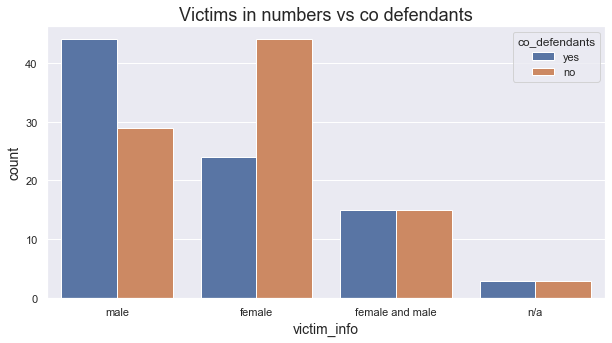

In [91]:
plt.figure(figsize=(10,5))
plt.title("Victims in numbers vs co defendants")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
sns.countplot(x="victim_info", hue="co_defendants", data=X_slim)

- When males were the victims, there were co-defendants in the majority of cases.
- When females were the victims, most crimes were committed alone.
- On mixed crimes, there is a 50/50 ratio.

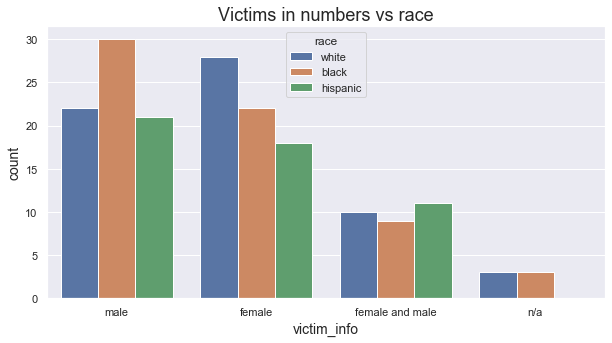

In [92]:
plt.figure(figsize=(10,5))
plt.title("Victims in numbers vs race")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
sns.countplot(x="victim_info", hue="race", data=X_slim)

- Blacks committed most of the male-victim crimes.
- Whites committed most female-victim crimes.
- Hispanics commited most mixed-victim crimes.

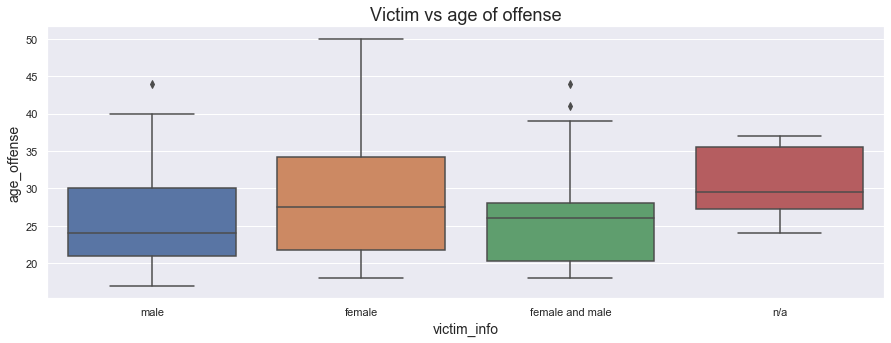

In [94]:
plt.figure(figsize=(15,5))
plt.title("Victim vs age of offense")
sns.boxplot(x="victim_info", y="age_offense", data=X_slim)

- Female-victim crimes have the highest age interval with a mean around 27/28. 
- Male-victim crimes are mostly committed by younger people with a mean around 24 years of age.
- Mixed-victim crimes fall in between.

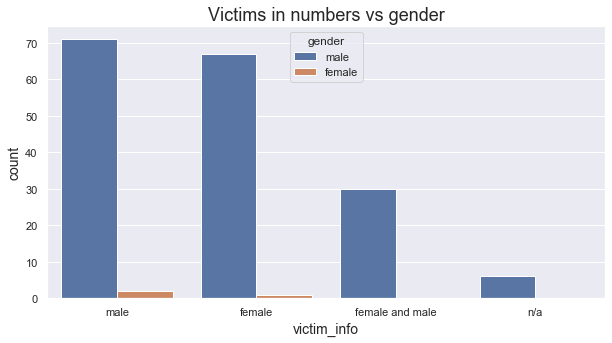

In [95]:
plt.figure(figsize=(10,5))
plt.title("Victims in numbers vs gender")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
sns.countplot(x="victim_info", hue="gender", data=X_slim)

- Almost all death-penalty crimes were committed by males.
- The females that received the death penalty mostly committed crimes on males.
- No females commited mixed-victim crimes.

## Data Preprocessing

## KMeans on Numerical Features

## KPrototypes on All Features

## BGMM

## Outlier Detection

## Conclusions